In [10]:
%config Completer.use_jedi = False

import sys
import os
sys.path.append('..')
sys.path.append('../..')

## default libs

import cv2
import numpy as np
import pandas as pd

from tqdm import notebook, tqdm
import matplotlib.pylab as plt

import torch

In [11]:
%load_ext autoreload
%autoreload 2

In [12]:
%reload_ext autoreload
from configs.config import (
    model_config,
    dataset_config
)
from src.model import CTCModel
from src.dataset import OCRDataset
from src.decoder import greedy_decode, word_beam_search_decode, beam_search_decode, decode, _decode_sample
from src.engine import eval_fn
from src.metrics import get_metrics, get_metrics_from_str

In [13]:
def imread(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    return img

def imshow(image, label=None, figsize=(8,8), cmap='gray', **kwargs):
    plt.figure(figsize=figsize)
    if label:
        print(label)
    plt.imshow(image, **kwargs, cmap=cmap)
    plt.show()

In [14]:
def load_model(checkpoint_path: str='weights/crnn_model'):
    reader = CTCModel(model_config)
    reader.load_state_dict(torch.load(checkpoint_path, map_location=torch.device('cpu')))
    
    return reader

In [6]:
ds = OCRDataset(dataset_config)

In [7]:
_, val_loader = ds.get_train_val_loaders()
for b in val_loader:
    break

In [8]:
model = load_model()

In [9]:
def batch_validation(b, model=model):
    gt_labels = b['labels'].cpu().numpy()
    out = dict()
    pred = model(b['images'])
    out['gt_text'] = decode(gt_labels)
    out['greedy'] = greedy_decode(pred)
    out['beam_search'] = beam_search_decode(pred)
    out['word_beam_search'] = word_beam_search_decode(pred, mode='Words')
    out['word_beam_search_ngram'] = word_beam_search_decode(pred, mode='Ngrams')


    return b['images'].cpu().detach().numpy(), out

In [10]:
imgs, out = batch_validation(b)

/home/parallels/.local/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


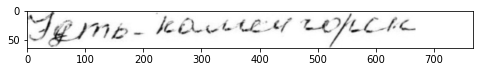

gt_text: Усть-Каменогорск
greedy: Усть-Каменгорск
beam_search: Усть-Каменгорск
word_beam_search: Усть-Каменюгорск
word_beam_search_ngram: УстьКаменогорск


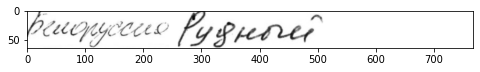

gt_text: Белоруссия Рудный
greedy: Белоруссия Рудный
beam_search: Белоруссия Рудный
word_beam_search: Белоруссия Рудный
word_beam_search_ngram: Белоруссия Рудный


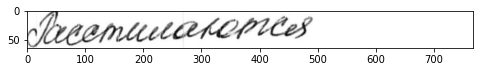

gt_text: Расстилаются
greedy: Расстилаются
beam_search: Расстилаются
word_beam_search: Расстилаются
word_beam_search_ngram: Расстилаются


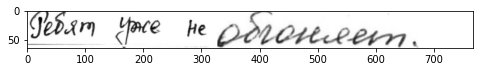

gt_text: Ребят уже не обгоняет.
greedy: Ребят уже не обгоняет.
beam_search: Ребят уже не обгоняет.
word_beam_search: Ребят уже не обгоняет.
word_beam_search_ngram: Ребят уже не обгоняет.


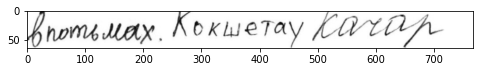

gt_text: впотьмах. Кокшетау Качар
greedy: впотьмах. Кокшетау Качар
beam_search: впотьмах. Кокшетау Качар
word_beam_search: впотьмах. Кокшетау Качар
word_beam_search_ngram: впотьмах. Кокшетау Качар


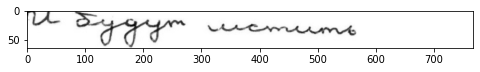

gt_text: И будут мстить
greedy: И будут мстить
beam_search: И будут мстить
word_beam_search: И будут мстить
word_beam_search_ngram: И будут мстить


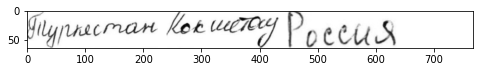

gt_text: Туркестан Кокшетау Россия
greedy: Туркестан Кокшетау Россия
beam_search: Туркестан Кокшетау Россия
word_beam_search: Туркестан Кокшетау Россия
word_beam_search_ngram: Туркестан Кокшетау Россия


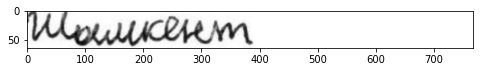

gt_text: Шымкент
greedy: Шымкент
beam_search: Шымкент
word_beam_search: Шымкент
word_beam_search_ngram: Шымкент


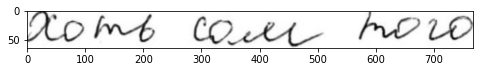

gt_text: Хоть сам того
greedy: Хоть сам того
beam_search: Хоть сам того
word_beam_search: Хоть сам того
word_beam_search_ngram: Хоть сам того


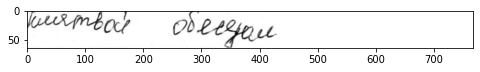

gt_text: клятвой обещал
greedy: клятвой обещал
beam_search: клятвой обещал
word_beam_search: клятвой обещал
word_beam_search_ngram: клятвой обещал


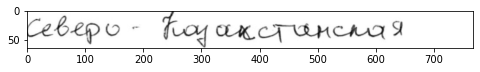

gt_text: Северо-Казахстанская
greedy: Северо-Казахстанская
beam_search: Северо-Казахстанская
word_beam_search: Северно-Казахстанская
word_beam_search_ngram: СевероКазахстанская


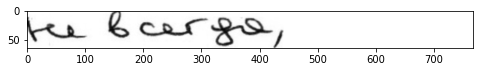

gt_text: не всегда,
greedy: не всегда,
beam_search: не всегда,
word_beam_search: не всегда,
word_beam_search_ngram: не всегда,


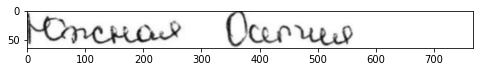

gt_text: Южная Осетия
greedy: Южная Осетия
beam_search: Южная Осетия
word_beam_search: Южная Осетия
word_beam_search_ngram: Южная Осетия


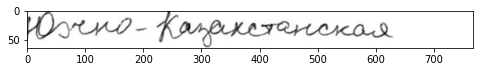

gt_text: Южно-Казахстанская
greedy: Южно-Казахстанская
beam_search: Южно-Казахстанская
word_beam_search: Южно-Казахстанская
word_beam_search_ngram: Южно-Казахстанская


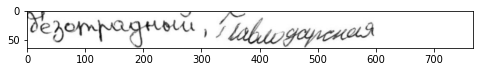

gt_text: безотрадный, Павлодарская
greedy: безотрадный, Павлодарская
beam_search: безотрадный, Павлодарская
word_beam_search: безотрадный, Павлодарская
word_beam_search_ngram: безотрадный, Павлодарская


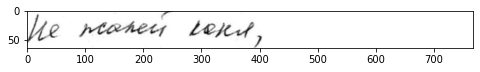

gt_text: Не жалей коня,
greedy: Не жалей коня,
beam_search: Не жалей коня,
word_beam_search: Не жалей коня,
word_beam_search_ngram: Не жалей коня,


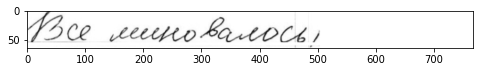

gt_text: Все миновалось,
greedy: Все миновалось,
beam_search: Все миновалось,
word_beam_search: Все миновалось,
word_beam_search_ngram: Все миновалось,


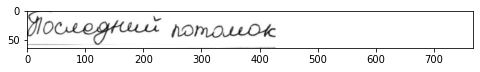

gt_text: Последний потомок
greedy: Послодний потомок
beam_search: Послодний потомок
word_beam_search: Последний потомок
word_beam_search_ngram: Последний потомок


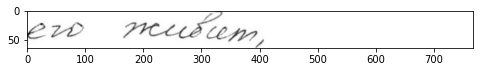

gt_text: его живит,
greedy: его живит,
beam_search: его живит,
word_beam_search: его живит,
word_beam_search_ngram: его живит,


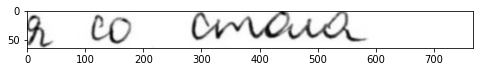

gt_text: я со стола
greedy: я со стола
beam_search: я со стола
word_beam_search: я со стола
word_beam_search_ngram: я со стола


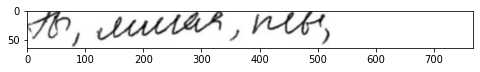

gt_text: Ты, милая, ты,
greedy: Т, миая, ты,
beam_search: Т, милая, ты,
word_beam_search: Ты, милая, ты,
word_beam_search_ngram: Ты, милая, ты,


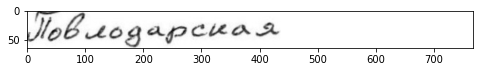

gt_text: Повлодарская
greedy: Павлодарская
beam_search: Павлодарская
word_beam_search: Павлодарская
word_beam_search_ngram: Павлодарская


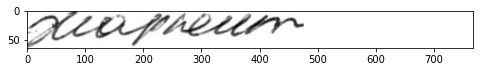

gt_text: Жаркент
greedy: Жаркент
beam_search: Жаркент
word_beam_search: Жаркент
word_beam_search_ngram: Жаркент


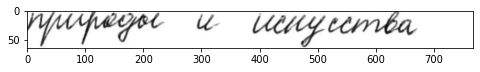

gt_text: природы и искусства
greedy: природы и искусства
beam_search: природы и искусства
word_beam_search: природы и искусства
word_beam_search_ngram: природы и искусства


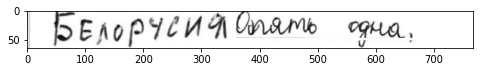

gt_text: БЕЛОРУСИЯ Опять одна,
greedy: БЕЛОРУСИЯ Опять одна,
beam_search: БЕЛОРУСИЯ Опять одна,
word_beam_search: БЕЛОРУСИЯ Опять одна,
word_beam_search_ngram: БЕЛОРУСИЯ Опять одна,


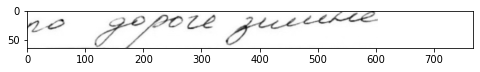

gt_text: по дороге зимне
greedy: по дороге зимне
beam_search: по дороге зимне
word_beam_search: по дороге зимне
word_beam_search_ngram: по дороге зимне


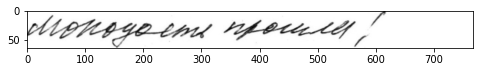

gt_text: молодость прошли!
greedy: молодость прошла!
beam_search: молодость прошла!
word_beam_search: молодость прошла!
word_beam_search_ngram: молодость прошла!


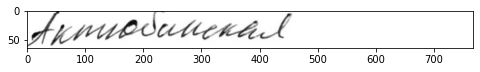

gt_text: Актюбинская
greedy: Актюбинская
beam_search: Актюбинская
word_beam_search: Актюбинская
word_beam_search_ngram: Актюбинская


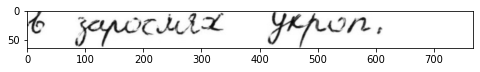

gt_text: в зарослях укроп.
greedy: в зарослях укроп.
beam_search: в зарослях укроп.
word_beam_search: в зарослях укроп.
word_beam_search_ngram: в зарослях укроп.


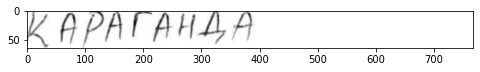

gt_text: КАРАГАНДА
greedy: КАРАГАНДЯ
beam_search: КАРАГАНДЯ
word_beam_search: КАРАГАНДА
word_beam_search_ngram: КАРАГАНДА


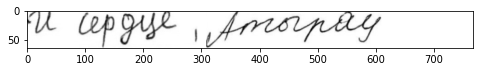

gt_text: И сердце, Атырау
greedy: И сердце, Атырау
beam_search: И сердце, Атырау
word_beam_search: И сердце, Атырау
word_beam_search_ngram: И сердце, Атырау


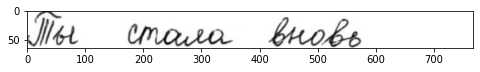

gt_text: Ты стала вновь
greedy: Ты стала вновь
beam_search: Ты стала вновь
word_beam_search: Ты стала вновь
word_beam_search_ngram: Ты стала вновь


In [11]:
for i, img in enumerate(imgs):
    imshow(img[0])
    for k, v in out.items():
        print(f'{k}: {v[i]}')

In [4]:
import easyocr
detecor = easyocr.Reader(['ru'], recognizer=False, detector=True)
def easy_ocr_detection(img, detector=detecor):
    img = img.copy()
    result = detector.detect(img)
    bboxes = []
    
    for box in result[0][0]: 
        sx, ex, sy, ey = box
        img = cv2.rectangle(img,(sx, sy),(ex, ey),(0,255,0),2)
        bboxes.append((sx, sy, ex, ey))
    return bboxes, img

/home/parallels/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper
/home/parallels/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:293: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  plugin_module = __import__('skimage.io._plugins.' + modname,
/home/parallels/.local/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: /home/parallels/.local/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZNK2at10TensorBase21__d

In [5]:
import os
paths = []
for f in os.listdir('imgs/'):
        if f.startswith('.'):
            continue
        paths.append(f'imgs/{f}')


In [ ]:
for p in paths:
    img = imread(p)
    _, detected = easy_ocr_detection(img)
    imshow(detected)

/home/parallels/.local/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
